### Optimization test with a simple function
Minimize f(x, y) = (x - 3)^2 + (y + 1)^2

In [1]:
import matplotlib.pyplot as plt
from pipeoptz import Pipeline, Node, FloatParameter, PipelineOptimizer

In [2]:
def squared_error(x, y):
    return (x - y)**2

def add(x, y):
    return x + y

In [3]:
pipe = Pipeline("SimplePipeline")
pipe.add_node(Node("X", squared_error, fixed_params={"x":0, "y":-3}))
pipe.add_node(Node("Y", squared_error, fixed_params={"x":-1, "y":0}))
pipe.add_node(Node("Add", add), predecessors={"x":"X", "y":"Y"})

In [4]:
def loss_func(result, _):
    """We want to find the minimum of the simple function, so we return its value."""
    return result

In [5]:
optimizer = PipelineOptimizer(pipe, loss_function=loss_func)
optimizer.add_param(FloatParameter("X", "x", -5., 5.))
optimizer.add_param(FloatParameter("Y", "y", -5., 5.))

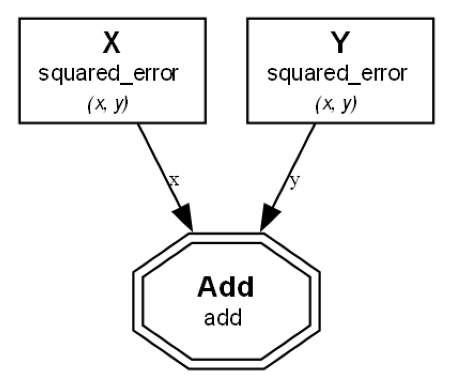

In [6]:
from PIL import Image

pipe.to_image("opti.png")
im = Image.open("opti.png")
plt.axis('off')
plt.imshow(im)

### Grid Search

Best parameters: {'X.x': -3.419238313016786, 'Y.y': -0.9413300063339749}
Wanted: (3, -1)
Final loss: 0.1792029312579319


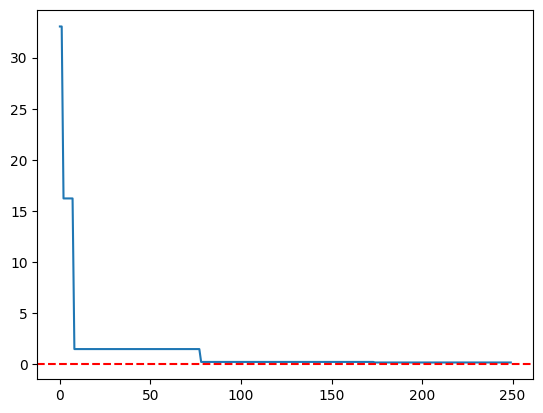

In [7]:
best_params, loss_log = optimizer.optimize([{}], [0], method="GS", max_combinations=250)
print("Best parameters:", best_params)
print("Wanted:", (3, -1))
print("Final loss:", loss_log[-1])
# plot the loss log in log scale
plt.plot(loss_log)
plt.axhline(0, color='red', linestyle='--')

### ACO

Best parameters: {'X.x': np.float64(-2.0562587237522614), 'Y.y': np.float64(-0.5804157455456238)}
Wanted: (3, -1)
Final loss: 1.0666985430797453


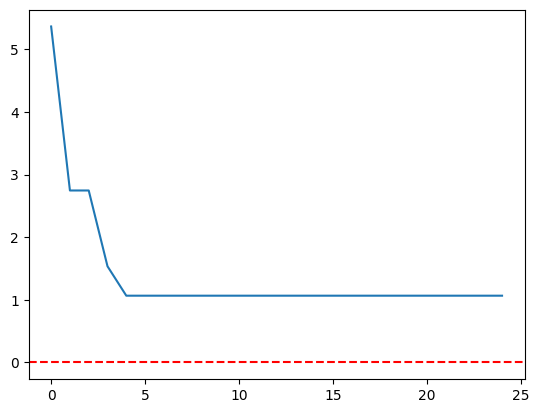

In [8]:
best_params, loss_log = optimizer.optimize([{}], [0], method="ACO", iterations=25, ants=10)
print("Best parameters:", best_params)
print("Wanted:", (3, -1))
print("Final loss:", loss_log[-1])
# plot the loss log in log scale
plt.plot(loss_log)
plt.axhline(0, color='red', linestyle='--')

### SA

Best parameters: {'X.x': -3.043011458604999, 'Y.y': -0.9918887934986387}
Wanted: (3, -1)
Final loss: 0.0019157772422372878


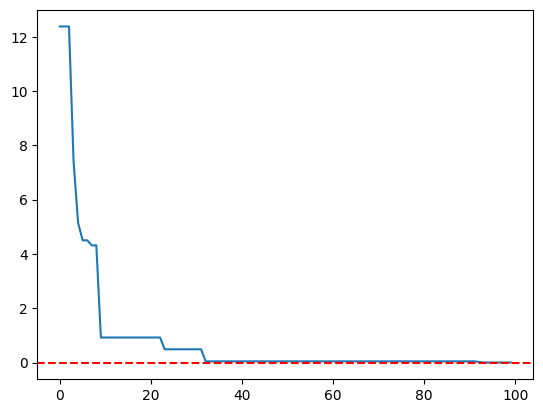

In [9]:
best_params, loss_log = optimizer.optimize([{}], [0], method="SA", iterations=100)
print("Best parameters:", best_params)
print("Wanted:", (3, -1))
print("Final loss:", loss_log[-1])
# plot the loss log in log scale
plt.plot(loss_log)
plt.axhline(0, color='red', linestyle='--')

### PSO

Best parameters: {'X.x': -3.0034266718245517, 'Y.y': -1.1726184494474023}
Wanted: (3, -1)
Final loss: 0.029808871169418577


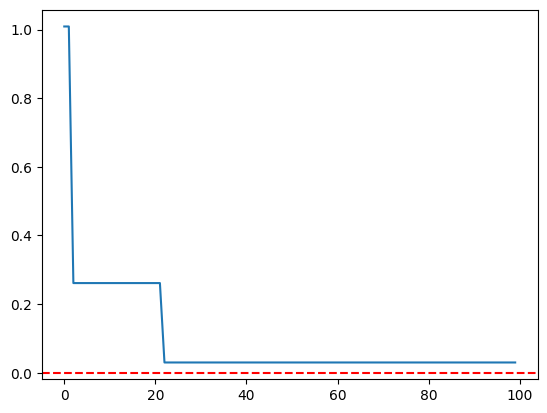

In [10]:
best_params, loss_log = optimizer.optimize([{}], [0], method="PSO", iterations=100)
print("Best parameters:", best_params)
print("Wanted:", (3, -1))
print("Final loss:", loss_log[-1])
# plot the loss log in log scale
plt.plot(loss_log)
plt.axhline(0, color='red', linestyle='--')

### GA

Best parameters: {'X.x': -3.016832393362534, 'Y.y': -0.9498619511968664}
Wanted: (3, -1)
Final loss: 0.002797153404096482


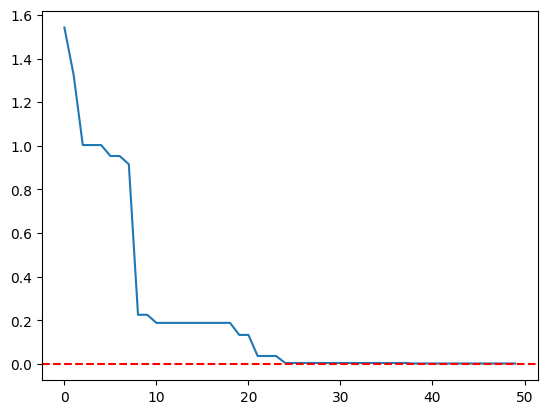

In [11]:
best_params, loss_log = optimizer.optimize([{}], [0], method="GA", generations=50)
print("Best parameters:", best_params)
print("Wanted:", (3, -1))
print("Final loss:", loss_log[-1])
# plot the loss log in log scale
plt.plot(loss_log)
plt.axhline(0, color='red', linestyle='--')

### BO

Best parameters: {'X.x': -2.902085719507813, 'Y.y': -0.9940903702674664}
Wanted: (3, -1)
Final loss: 0.009622130047878335


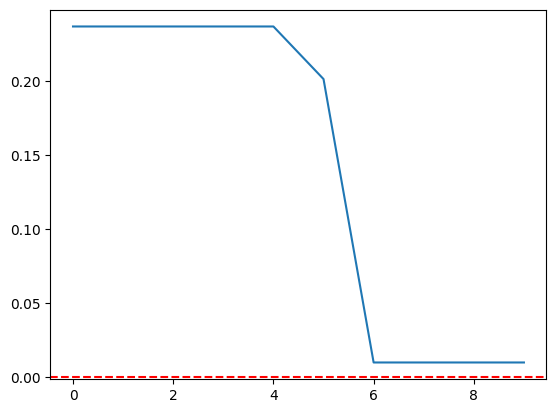

In [12]:
best_params, loss_log = optimizer.optimize([{}], [0], method="BO", iterations=10)
print("Best parameters:", best_params)
print("Wanted:", (3, -1))
print("Final loss:", min(loss_log))
# plot the loss log in log scale
plt.plot(loss_log)
plt.axhline(0, color='red', linestyle='--')